# Lab 11: Bootstrap

Suppose $x_1, \ldots, x_{10} \sim \operatorname{Normal}\left(\mu, \sigma^2\right)$. Let $\hat{\mu}$ be an estimator of $\mu$. It could be the sample mean, sample median, maximum likelihood estimator, or any point estimator. We will calculate $\operatorname{var}(\hat{\mu})$ using bootstrap samples.

In [1]:
data = rnorm(10, mean=4, sd=2)
sample_median = median(data)
sample_median

[1] 3.651612

## Parametric bootstrap:
We estimate the unknown parameters, $\hat{\mu}_{MLE}=\bar{x}$ and $\widehat{\sigma^2}_{MLE}=$ sample variance

In [2]:
mu_hat = mean(data)
var_hat = var(data)

Generate $k$ bootstrap samples from the $Normal(\hat{\mu}_{MLE}, \widehat{\sigma^2}_{MLE})$

In [3]:
k=100
bootstrap_sample = matrix(0, nrow=10, ncol=k)
for(i in 1:k){
  bootstrap_sample[,i] = rnorm(10, mean=mu_hat, sd=sqrt(var_hat))
}

Calculate $\hat{\mu}$, i.e., the sample median for each bootstrap sample, $\left\{\widehat{\mu_1}, \ldots, \widehat{\mu_k}\right\}$

In [4]:
sample_median = 1:k
for(i in 1:k){
  sample_median[i] = median(bootstrap_sample[,i])
}
sample_median

[1] 3.693249 3.102472 3.564707 3.550283 3.150773 3.414734 3.321765 3.748332
  [9] 3.842290 3.628165 4.386479 3.930005 4.098497 3.173004 3.662726 3.950955
 [17] 4.186498 3.733906 3.433219 3.741006 3.954339 4.009711 4.719265 3.584725
 [25] 3.604195 3.903356 3.948371 3.582499 3.451431 3.274044 3.547120 3.719537
 [33] 3.235113 3.201361 3.760471 3.439132 3.525470 3.752946 3.923377 3.803822
 [41] 3.543155 3.092602 3.482148 3.184460 3.599062 3.965851 3.718224 2.617538
 [49] 4.004815 3.701016 2.583319 3.602670 3.571635 3.612645 3.419009 2.769334
 [57] 3.319926 3.459001 3.943733 3.849592 3.554860 3.069670 3.672231 4.185848
 [65] 2.759106 3.066653 2.677108 3.642015 3.322782 4.255941 3.843123 3.366519
 [73] 3.715943 3.399461 3.541392 3.068752 3.279861 3.694308 3.846330 3.784560
 [81] 3.354868 3.416635 3.885721 4.193758 3.095893 3.982305 3.463820 3.086478
 [89] 3.415895 3.682776 3.849248 4.049121 3.841862 4.021842 3.525969 3.508749
 [97] 4.469824 3.219970 3.540820 3.160946

Calculate the sample variance $S^2$ of $\left\{\widehat{\mu_1}, \ldots, \widehat{\mu_k}\right\}$, i.e., $\frac{1}{k-1} \sum_{i=1}^k\left(\widehat{\mu_i}-\widehat{\mu}\right)^2$ and $\operatorname{var}(\hat{\mu}) \approx S^2$

In [5]:
var(sample_median)

[1] 0.1518791

## Nonparametric bootstrap
We generate bootstrap samples by resampling the original data with replacement.

In [6]:
bootstrap_sample = matrix(0, nrow=10, ncol=k)
for(i in 1:k){
  bootstrap_sample[,i] = sample(data,10,replace=T)
}

We calculate the sample median for each bootstrap sample

In [7]:
sample_median = 1:k
for(i in 1:k){
  sample_median[i] = median(bootstrap_sample[,i])
}
sample_median

[1] 2.960422 3.885279 4.002665 3.885279 3.341917 3.341917 3.943972 3.232103
  [9] 2.893881 4.308411 3.379931 3.341917 4.002665 4.308411 3.710306 3.613598
 [17] 3.341917 3.651612 2.960422 3.943972 3.710306 3.943972 3.651612 4.308411
 [25] 3.651612 3.417946 3.613598 3.651612 3.885279 4.354289 3.379931 4.002665
 [33] 3.651612 3.885279 2.960422 3.417946 4.002665 3.417946 3.417946 4.249717
 [41] 3.710306 3.885279 3.651612 3.417946 4.249717 3.379931 3.651612 4.308411
 [49] 4.016051 3.672291 3.379931 3.613598 3.710306 3.885279 4.308411 3.651612
 [57] 4.614156 4.308411 3.341917 3.613598 3.885279 3.651612 3.885279 4.061929
 [65] 3.613598 3.651612 3.379931 3.379931 4.614156 2.960422 3.651612 3.651612
 [73] 3.885279 4.002665 4.308411 4.249717 3.651612 3.943972 3.885279 3.417946
 [81] 3.341917 3.651612 3.341917 4.002665 3.379931 3.232103 4.016051 3.417946
 [89] 2.578928 3.417946 3.651612 3.613598 3.379931 3.651612 3.651612 3.885279
 [97] 3.710306 4.002665 3.672291 4.002665

We calculate the sample variance $S^2$ of $\left\{\widehat{\theta_1}, \ldots, \widehat{\theta_k}\right\}$, i.e., $\frac{1}{k-1} \sum_{i=1}^k\left(\widehat{\theta_t}-\widehat{\theta}\right)^2$ and $\operatorname{var}(\hat{\theta}) \approx S^2$

In [8]:
var(sample_median)

[1] 0.1439192

## Building bootstrap phylogenetic trees
We build a distance phylogenetic tree using the DNA alignment in test.phy.

Loading required package: ape



Loading required package: Matrix




Attaching package: 'phybase'




The following objects are masked from 'package:ape':

    dist.dna, node.height




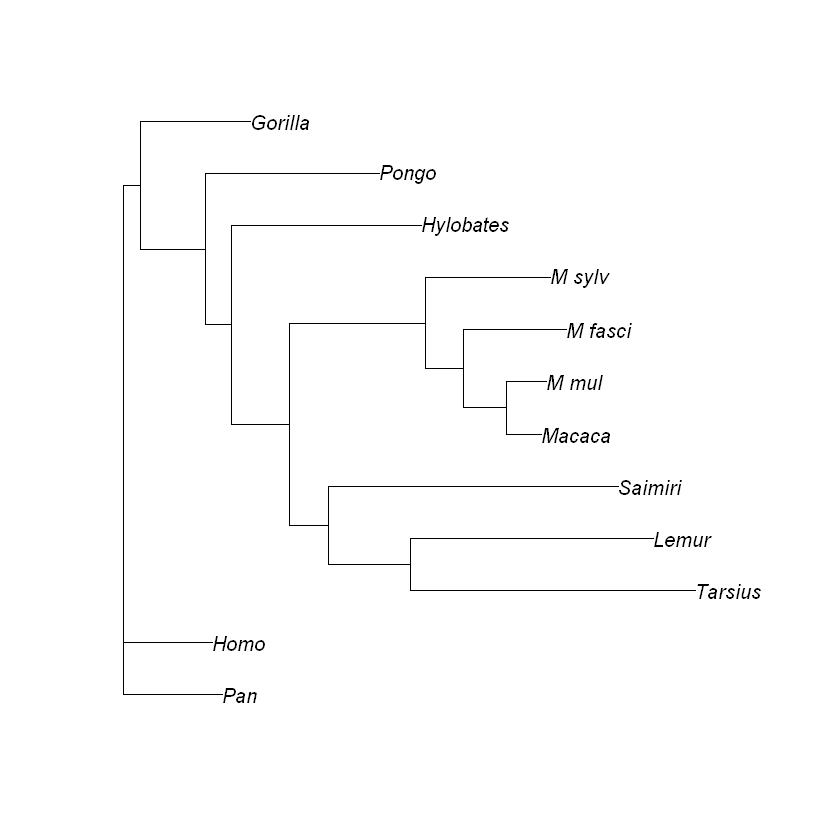

In [9]:
library(phybase)
data = read.dna.seq("./data/lab15_primates.phy",format="phylip")
seq = data$seq
d = dist.dna(seq)
rownames(d) = data$name
plot(nj(d))

We generate 100 nonparametric boostrap samples, i.e., resampling columns of the DNA alignment with replacement. Then, we build a tree for each bootstrap sample.

100 phylogenetic trees

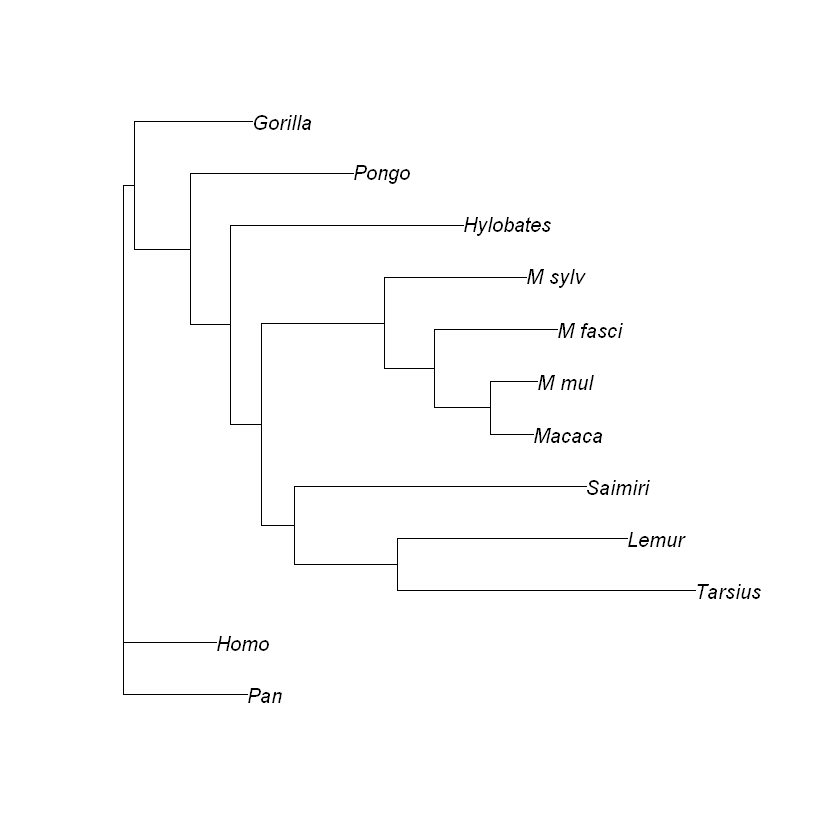

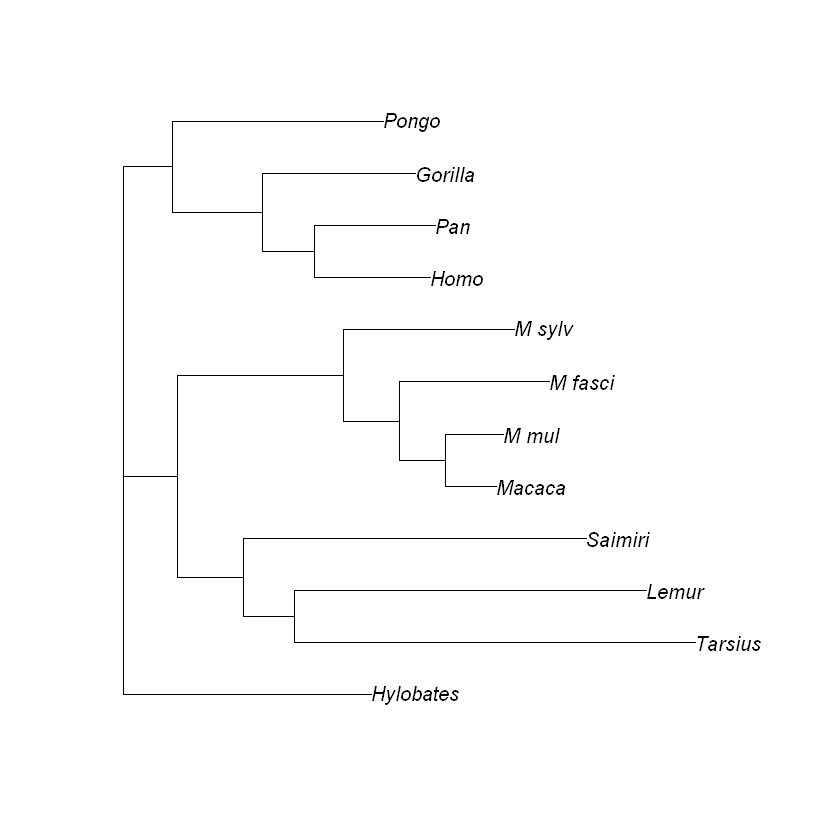

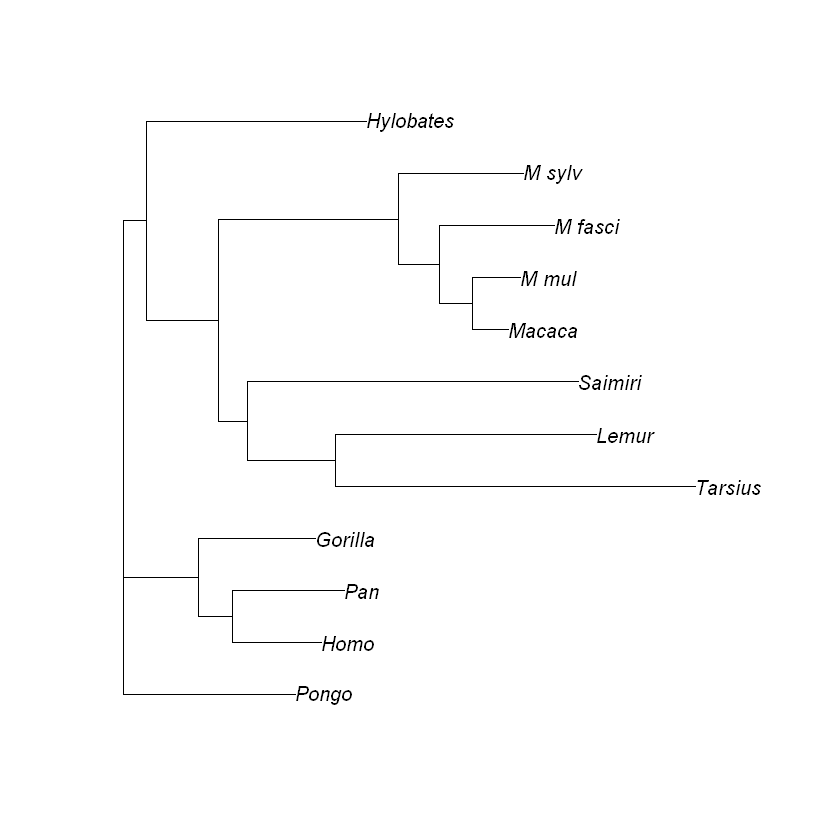

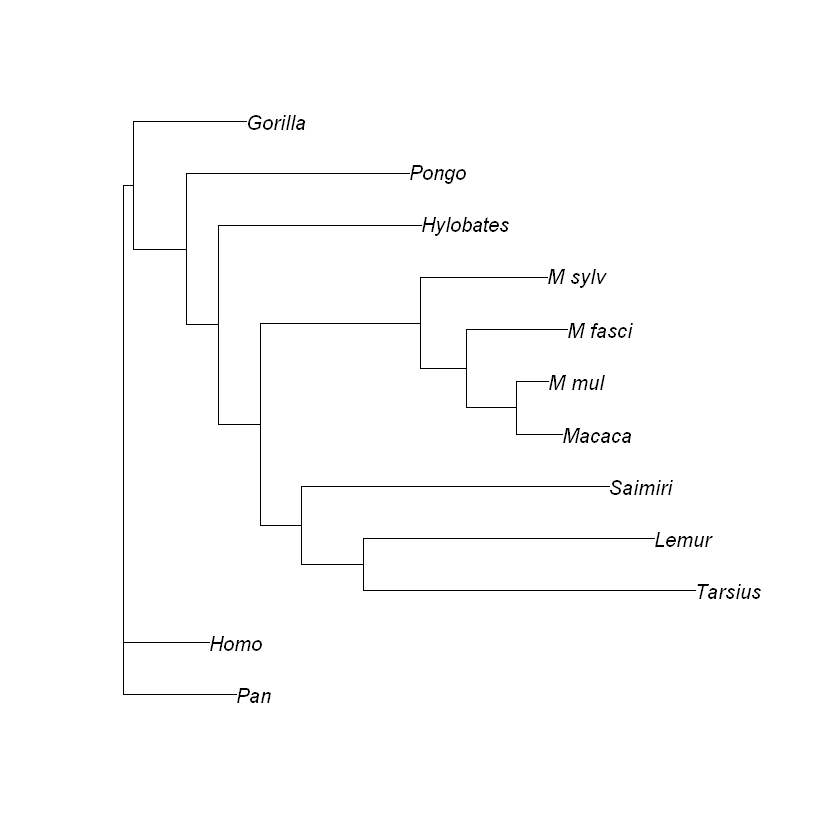

In [10]:
ncol = dim(seq)[2]
nbootstrap = 100
bootstrap_tree = rep("",nbootstrap)

for(i in 1:nbootstrap){
  columns = sample(1:ncol,ncol,replace=T)
  bootstrap_sample = seq[,columns]
  d = dist.dna(bootstrap_sample)
  rownames(d) = data$name
  bootstrap_tree[i] = write.tree(nj(d))
}

trees = read.tree(text=bootstrap_tree)
trees

plot(trees[1])
plot(trees[2])
plot(trees[3])
plot(trees[4])